In [17]:
#en base tutorial https://youtu.be/h1ae43Z6uIE

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#load_iris?
#Este es un dataset multivariado que contiene 50 muestras de 3 especies de la flor Iris (iris setosa, Iris virgínica e Iris versicolor). En cada caso, se midió en centímetros largo y ancho del sépalo y del pétalo.


In [30]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
data_df = pd.DataFrame (iris.data, columns=iris.feature_names)
data_df["target"]=iris.target
data_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
#z=w1x1+…+wmxm
#El perceptron ϕ(z) se considera activo cuando su valor es mayor o igual al umbral θ o inactivo en cualquier otro caso.


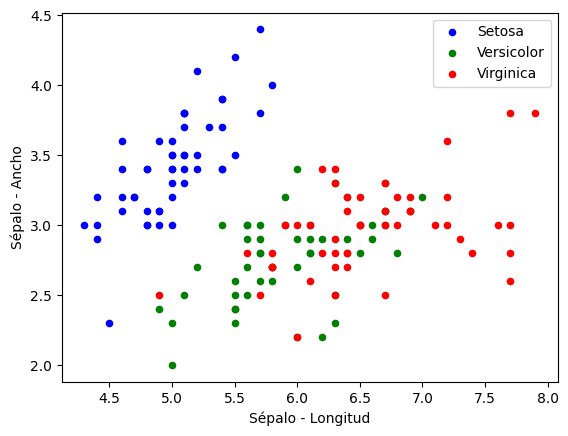

In [32]:
#Grafico Sepal - Longitud vs Ancho
fig = data_df[data_df.target == 0].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Setosa')
data_df[data_df.target == 1].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='green', label='Versicolor', ax=fig)
data_df[data_df.target == 2].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')

plt.show()

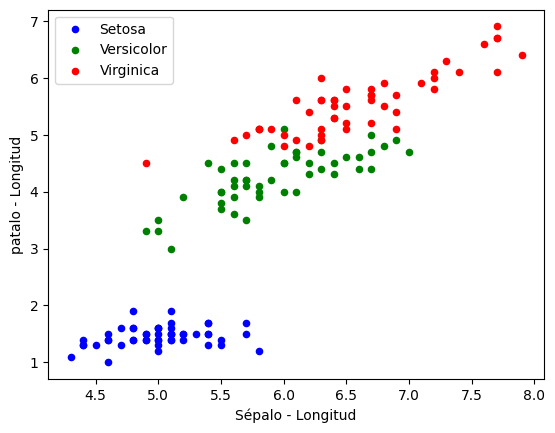

In [33]:
#Grafico - Longitud sepal vs Longitud Petalo
fig = data_df[data_df.target == 0].plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', color='blue', label='Setosa')
data_df[data_df.target == 1].plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', color='green', label='Versicolor', ax=fig)
data_df[data_df.target == 2].plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('patalo - Longitud')

plt.show()

In [25]:
#Datos linealmente separables Setosa vs (Versicolor o Virginica)
#Datos linealmente inseparables (Versicolor vs Virginica)
#En el caso del dataset Iris, al graficar todas las clases por largo del pétalo y largo del sétalo, podemos ver que las setosas son linealmente separables de las virgínicas y las versicolor.
#usaremos las clases Iris-setosa y Iris-versicolor para el clasificarlas con el perceptron.




In [34]:
#datos de setosas
setosa_data=data_df[data_df["target"]==0]
versicolor_data=data_df[data_df["target"]==1]

#preparar los datos
data_df = data_df[data_df["target"].isin([0,1])]
X=data_df[["sepal length (cm)","petal length (cm)"]].values
Y=data_df["target"].values

#uso random_state para mantener los mismos numeros, si no cada ejecucion daria diferente

X_train,X_test, Y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=39)
X_train


array([[5.2, 1.4],
       [5.7, 1.7],
       [6.1, 4. ],
       [4.8, 1.6],
       [5.5, 3.8],
       [4.9, 1.5],
       [4.4, 1.3],
       [5. , 3.3],
       [5. , 1.6],
       [5.8, 3.9],
       [5.1, 1.6],
       [5.4, 1.7],
       [5.4, 1.5],
       [6. , 5.1],
       [5. , 1.4],
       [4.6, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [5.4, 1.3],
       [6.2, 4.3],
       [5. , 1.5],
       [5.1, 1.5],
       [5. , 1.2],
       [5. , 1.6],
       [5.1, 1.4],
       [5.8, 4.1],
       [5.9, 4.2],
       [5.1, 3. ],
       [6.7, 4.7],
       [5.6, 4.5],
       [6.1, 4.7],
       [6.2, 4.5],
       [6.1, 4.7],
       [5. , 1.3],
       [5.5, 1.4],
       [4.6, 1.5],
       [6.3, 4.7],
       [5.5, 4.4],
       [6. , 4. ],
       [6.5, 4.6],
       [4.8, 1.4],
       [5.1, 1.7],
       [6. , 4.5],
       [6.1, 4.6],
       [4.4, 1.4],
       [6.3, 4.9],
       [5.6, 3.9],
       [5.7, 4.2],
       [5.5, 4. ],
       [5.8, 4. ],
       [5.5, 1.3],
       [5.8, 1.2],
       [5.7,

In [35]:
perceptron= Perceptron(max_iter=20, eta0=0.05)
perceptron.fit(X_train,Y_train)
pesos = perceptron.coef_[0]
bias = perceptron.intercept_[0]
print ("los pesos son :",pesos);
print ("bias es :",bias);


los pesos son : [-0.19  0.5 ]
bias es : -0.1


In [43]:
Y_pred = perceptron.predict(X_test)
print (Y_pred);
print (y_test);

#para verificar
print (perceptron.predict(np.array([4.9,1.4]).reshape(1,-1)))

print (classification_report(y_test, Y_pred))
#falta metricas, matriz de confusion y distribucion del error
#mlp regresor clasi

[0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0]
[0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0]
[0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

